# TPOT para classificação de preços de celulares

O objetivo desse projetio é utilizar uma biblioteca de AutoML (Auto Machine Learning) para criar um modelo de classificação para o preço de celulares. A biblioteca se chama TPOT e a sua função é automatizar todo processo de pipeline de machine learning e gerando um modelo com o melhor desempenho, por meio de algoritmos genéticos; ao invés de usar várias técnicas, vários parâmetros e realizar várias etapas dos processos, a biblioteca TPOT testa todos esses recursos, o que dá uma economia de tempo. Outra vantagem é que não é necessário escolher vários modelos (que nesse caso, são de classificação) de forma antecipada. 

# Dados

Os dados usados nesse projeto podem ser obtidos [aqui](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). São dados com características de celulares e são ao todo 20 features que são:

1) **battery_power**: Energia total que uma bateria pode armazenar de uma só vez, medida em mAh;

2) **blue** : Tem bluetooth ou não;

3) **clock_speed**: velocidade na qual o microprocessador executa instruções;

4) **dual_sim**: Tem suporte para dual sim ou não;

5) **fc**: Mega pixels da câmera frontal;

6) **four_g**: Tem 4G ou não;

7) **int_memory**: Memória interna em Gigabytes;

8) **m_dep**: Profundidade móvel em cm;

9) **mobile_wt**: Peso do telefone móvel;

10) **n_cores**: Número de núcleos do processador;

11) **pc**: Mega pixels da câmera principal;

12) **px_height**: Altura da resolução de pixels;
      
13) **px_width**: Largura de resolução de pixel;

14) **ram**: Memória de acesso aleatório em mega bytes;

15) **sc_h**: Altura da tela do celular em cm;

16) **sc_w**: Largura da tela do celular em cm;

17) **talk_time**: tempo que uma única carga de bateria durará;

18) **three_g**: Tem 3G ou não;

19) **touch_screen**: Possui tela sensível ao toque ou não;

20) **wifi**:Tem wifi ou não;

E o target (**price_range**, que é o preço) está definido da seguinte forma:

a) 0 (baixo custo);

b) 1 (custo médio);

c) 2 (alto custo);

d) 3 (custo muito alto).

Então a questão é saber se o celular está classificado em um desses tipos de preços.

## Etapas do projeto

1) Análise exploratória dos dados;

2) Tratamento dos dados;

3) Aplicação de AutoML;

4) Avaliação do modelo;

5) Treinamento, avaliação e validação do modelo.

## Importando as bibliotecas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from tpot import TPOTClassifier
from sklearn.decomposition import PCA

## Importando os dados

In [23]:
train=pd.read_csv("train_cell.csv")
test=pd.read_csv("test_cell.csv")

In [24]:
#Visualizando os dados dos datasets de treino e teste
#OBS: o dataset de teste será usado para a validação do modelo, serão os dados que o modelo nunca viu
display(train.head())
display(test.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [25]:
#Tabela com as estatísticas descritivas de cada dataset
display(train.describe())
display(test.describe())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [26]:
#Podemos ver que as colunas dos dois dataset não possuem valores missing
print(train.isna().sum())
print(test.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [27]:
#dimensões de cada dataset
train.shape,test.shape

#o dataset de treino tem 2000 linhas e 21 colunas

#o dataset de teste tem 1000 linhas e 21 colunas

((2000, 21), (1000, 21))

In [28]:
#colunas de cada dataset
train.columns.values,test.columns.values

(array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi', 'price_range'], dtype=object),
 array(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
        'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
        'three_g', 'touch_screen', 'wifi'], dtype=object))

In [29]:
#excluindo a coluna 'id' do dataset de teste
test=test.drop('id',axis=1)

In [30]:
#agora vemos que o dataset de treino tem 21 colunas e o dataset de teste tem 20 colunas
len(train.columns),len(test.columns)

(21, 20)

In [31]:
#informações sobre as colunas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Análise exploratória dos dados

Nessa etapa iremos explorar a base de dados e entender melhor o comportamento de cada coluna em relação a coluna *target* que é referente a classificação de preços de celulares.

Abaixo podemos ver que as classes da variável *price_rance* possuem o mesmo número de observações, logo não teremos problemas com classes desbalanceadas.

In [32]:
train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

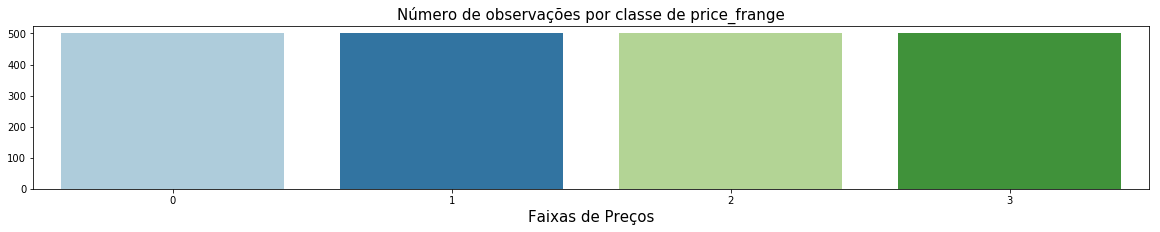

In [33]:
plt.figure(figsize=(20,3))
sns.countplot(train['price_range'],palette='Paired')
plt.xlabel('Faixas de Preços',size=15)
plt.title('Número de observações por classe de price_frange',size=15)
plt.ylabel('');

**BATTERY POWER**

Aqui podemos ver que os aparelhos de celulares com maior de maior preço possuem, em média, uma maior capacidade de bateria.

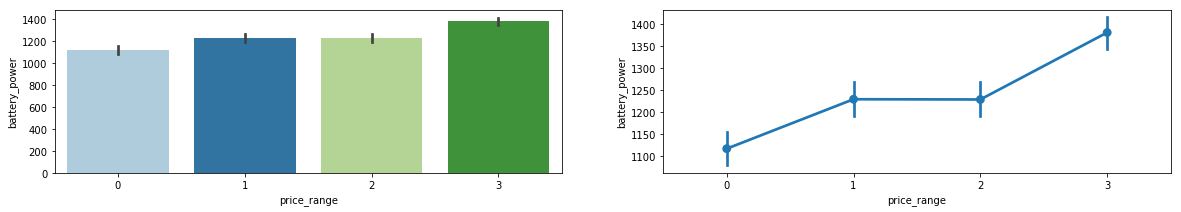

In [34]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='battery_power',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='battery_power',x='price_range',data=train,ax=axarr[1]);

**MOBILE WT**

Em média, aparelhos de celulares da faixa de preço 3 (muito caro) são mais leves, que as outras classes.

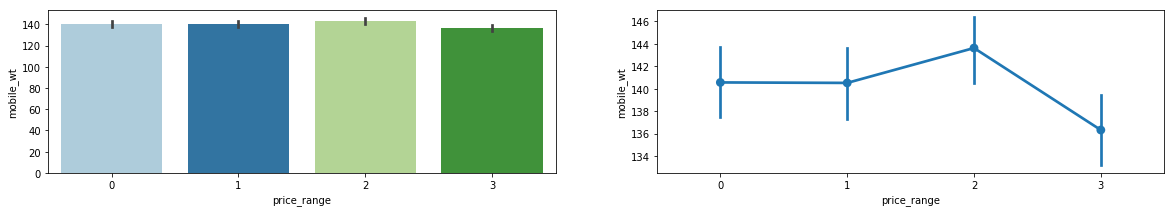

In [35]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='mobile_wt',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='mobile_wt',x='price_range',data=train,ax=axarr[1]);

**CLOCK SPEED**

Celulares da faixa de preço 1 possuem uma menor velocidade de microprocessador e da classe 0 uma velocidade maior.

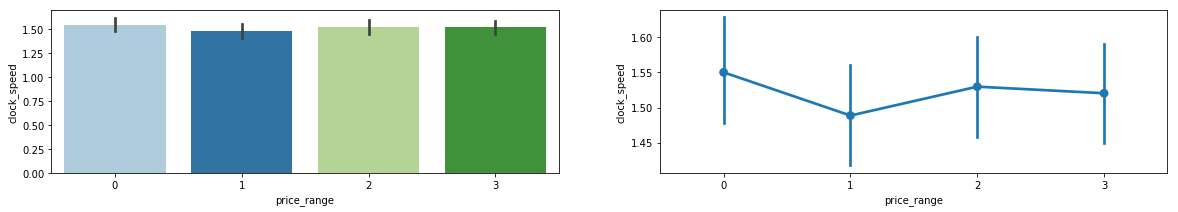

In [36]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='clock_speed',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='clock_speed',x='price_range',data=train,ax=axarr[1]);

**FC**

Percebemos que as classes de preços com maiores pixels de câmera frontal, em média, são a classe 1 e a classe 2.

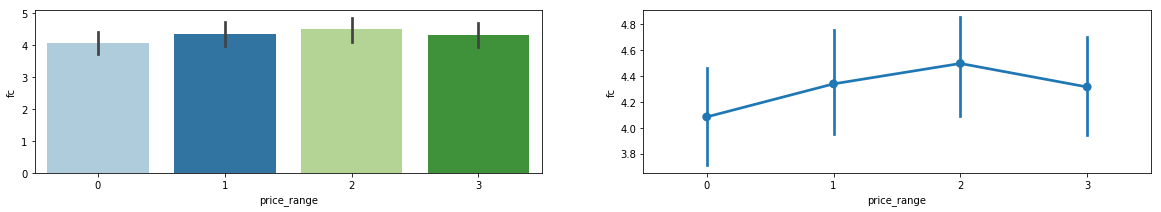

In [37]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 3))

sns.barplot(x='price_range',y='fc',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='fc',x='price_range',data=train,ax=axarr[1]);

#

**INT MEMORY**

Os aparelho de celular da classe 3 (muito caro) possuem maior a maior média de capacidade de memória interna.

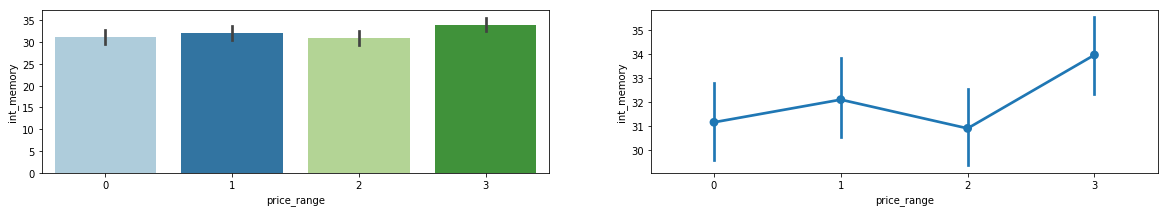

In [38]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='int_memory',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='int_memory',x='price_range',data=train,ax=axarr[1]);

**M_DEP**

Os aparelhos da classe 1 (custo médio) possuem, em média, uma maior profundidade móvel em cm.

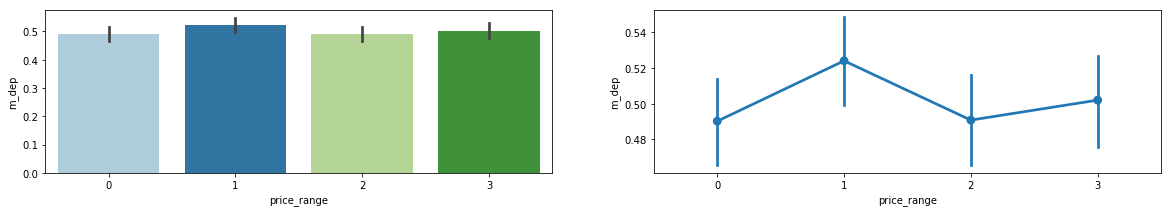

In [39]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='m_dep',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='m_dep',x='price_range',data=train,ax=axarr[1]);

**N_CORES**

A classe 0 e a classe 2 possuem a maior média de processadores *cores*, enquanto a classe 1 possui a menor média. Notar que a diferença de médias de processadores *cores* é bem significativa.

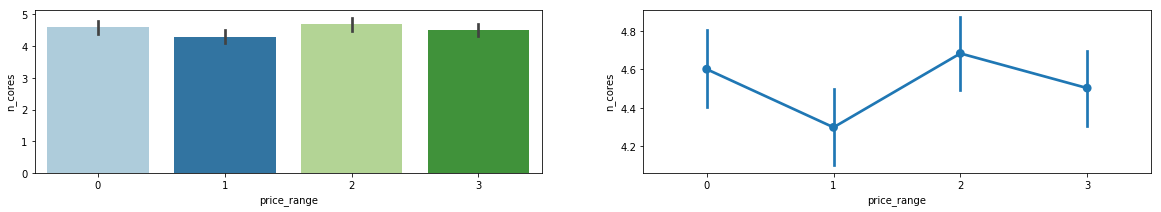

In [40]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='n_cores',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='n_cores',x='price_range',data=train,ax=axarr[1]);

**PC**

Quanto mais caro o aparelho de celular, maior o Mega Pixel da câmera princial.

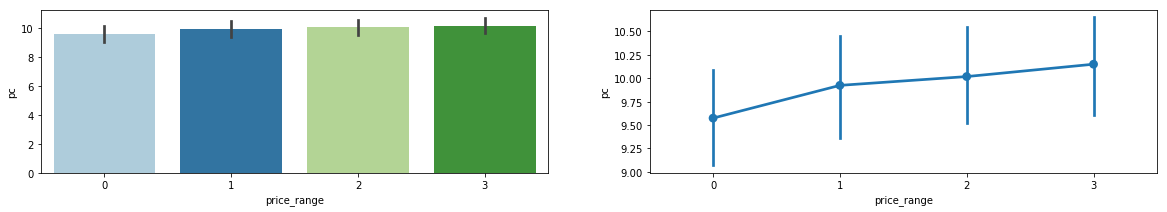

In [41]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='pc',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='pc',x='price_range',data=train,ax=axarr[1]);

**PX_HEIGHT**

Quanto mais caro o celular, maior (em média) a altura da resolução de pixels. Notar que a classe 1 tem uma altura de resolução maior que da classe 2.

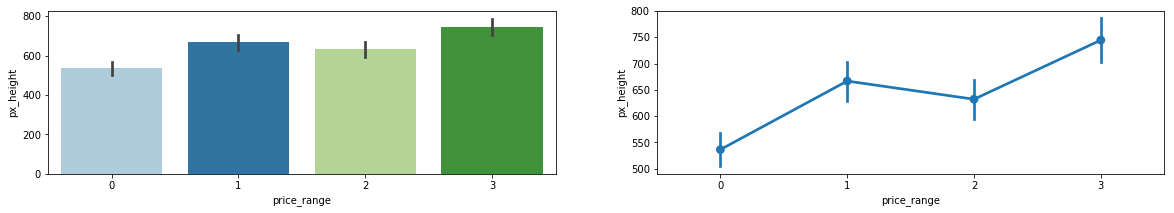

In [42]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='px_height',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='px_height',x='price_range',data=train,ax=axarr[1]);

**PX_WIDHT**

Quanto mais caro o celular, maior (em média) a largura da resolução de pixels

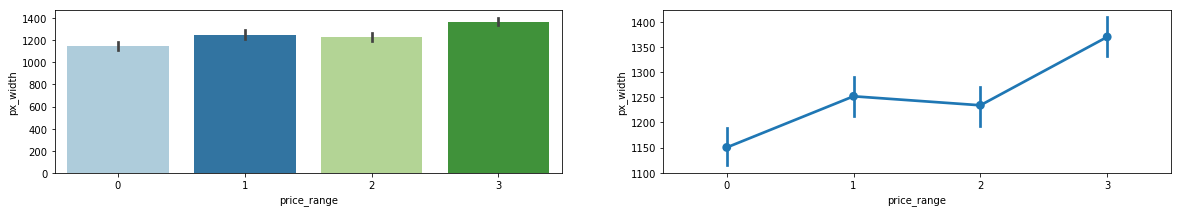

In [43]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='px_width',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='px_width',x='price_range',data=train,ax=axarr[1]);

**RAM**

A relação da classe do celular com a capacidade de memória RAM é linear e crescente.

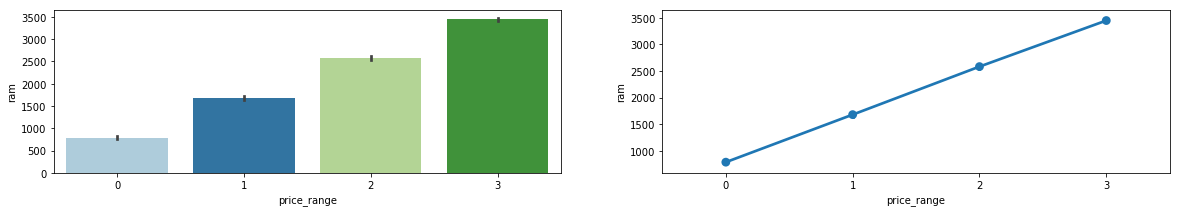

In [44]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='ram',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='ram',x='price_range',data=train,ax=axarr[1]);

**SC_H**

A classe com maior altura de tela de celular é a 3. Notar que da classe 0 a 2 a altura média do celular vai caindo.

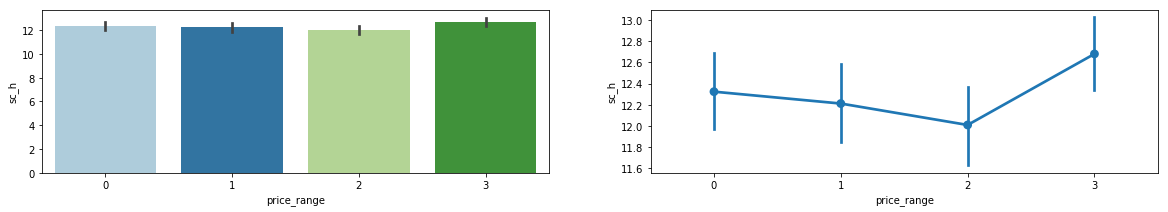

In [45]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='sc_h',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='sc_h',x='price_range',data=train,ax=axarr[1]);

**SC_W**

Quanto maior a faixa de preço, maior a largura da tela do celular.

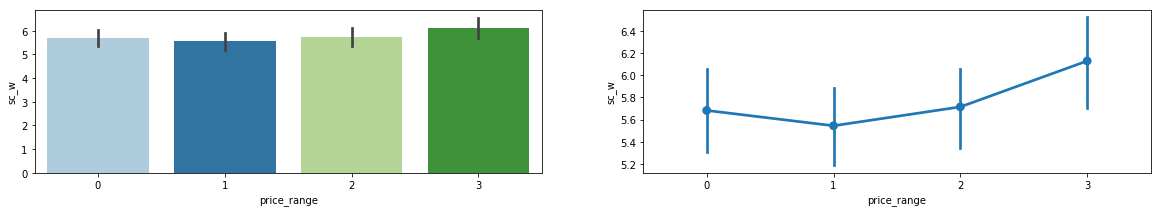

In [46]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='sc_w',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='sc_w',x='price_range',data=train,ax=axarr[1]);

**TALK_TIME**

A classe 1 é a que tem o maior tempo de duração de carga de bateria.

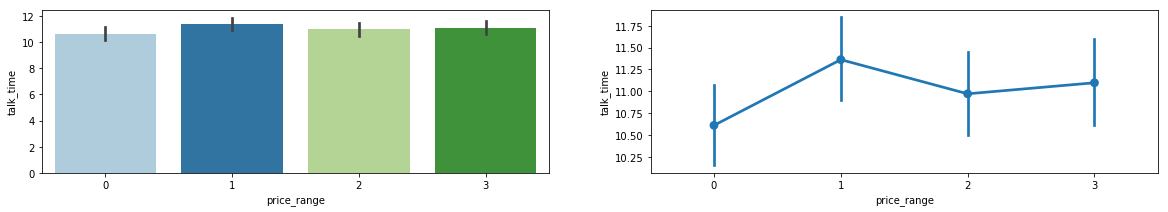

In [47]:
fig, axarr = plt.subplots(1, 2, figsize=(20,3))
sns.barplot(x='price_range',y='talk_time',data=train,palette='Paired',ax=axarr[0])
sns.pointplot(y='talk_time',x='price_range',data=train,ax=axarr[1]);

**Variáveis binárias**

A variáveis binárias são aquelas que possuem apenas duas respostas (0 ou 1, verdadeiro ou falso, sim ou não). Abaixo veremos os gráficos de cada variável binárias dos dataset de treino e teste, que no nosso caso são 6 (blue, dual_sim, four_g, three_g, touch_screen e wifi) e possuem resposta 0 (não tem) ou 1 (tem).

**1º Gráfico**: Mesmo sendo um diferença pequena, mas o número de celulares sem bluetooth é maior

**2º Gráfico**: Aqui há mais aparelho com dual sim

**3º Gráfico**: A maior parte dos aparelho possui 4G

**4º Gráfico**: Já aqui, vemos que a grande maioria dos aparelhos tem 3G

**5º Gráfico**: Praticamente a quantidade é a mesma dos que tem touch screen dos qe não tem

**6º Gráfico**: O núemro de aparelhos que tem wifi são um pouco maior dos que não tem

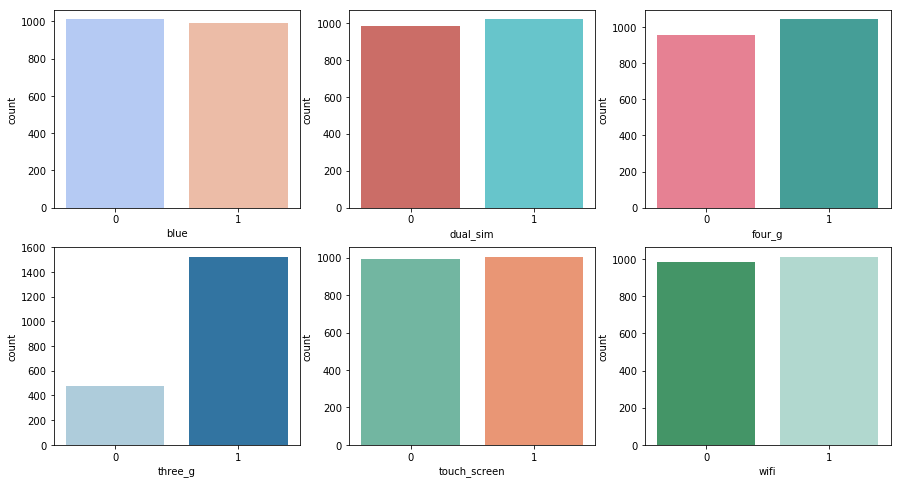

In [48]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 8))
sns.countplot(train['blue'],palette='coolwarm',ax=axarr[0][0])
sns.countplot(train['dual_sim'],palette='hls',ax=axarr[0][1])
sns.countplot(train['four_g'],palette='husl',ax=axarr[0][2])
sns.countplot(train['three_g'],palette='Paired',ax=axarr[1][0])
sns.countplot(train['touch_screen'],palette='Set2',ax=axarr[1][1])
sns.countplot(train['wifi'],palette='BuGn_r',ax=axarr[1][2]);

O mesmo comportamento que as variáveis binárias tem no *dataset* de treino repete-se no *dataset* de teste.

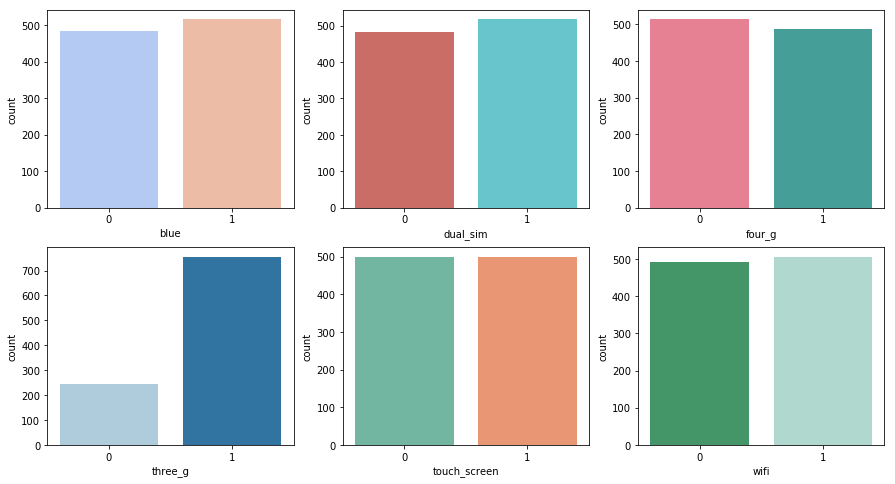

In [49]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 8))
sns.countplot(test['blue'],palette='coolwarm',ax=axarr[0][0])
sns.countplot(test['dual_sim'],palette='hls',ax=axarr[0][1])
sns.countplot(test['four_g'],palette='husl',ax=axarr[0][2])
sns.countplot(test['three_g'],palette='Paired',ax=axarr[1][0])
sns.countplot(test['touch_screen'],palette='Set2',ax=axarr[1][1])
sns.countplot(test['wifi'],palette='BuGn_r',ax=axarr[1][2]);

## Distribuição dos dados

Saber como está a distribuição dos dados é importante, pois muitos modelos de machine learning consideram que os dados estão sob **distribuição normal**, sendo assim identificar se os dados estão com alguma distribuição diferente é importante para sabermos se precisaremos transformá-los (Padronização, mais adequada para modelos de classificação) para poder treinar os modelos.

Para sabermos se a distribuição dos dados estão sob normalidade ou não temos duas alternativas: uma subjetiva e outra objetiva.

A forma subjetiva é observar se o formato da distribuição dos dados possui um **formato de sino** e a forma objetiva é usar um teste estatístico que analisará a curtose e a assimetria da distribuição dos dados (Shapiro-Wilk ou Jarque-Bera).

Abaixo vamos olhar a distribuição das variáveis (excluindo as variáveis binárias, pois por definição, temos apenas 2 valores e por isso não há uma distribuição para eles).

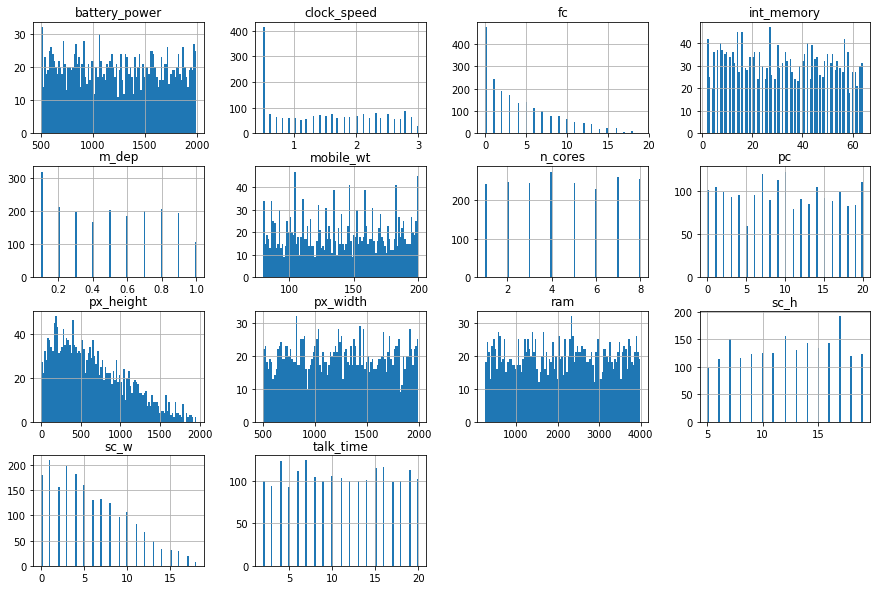

In [50]:
train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
       'sc_w','talk_time']].hist(figsize=(15,10),bins=100);

#Podemos ver que nenhum histograma se assemelha com formato de sino, como é uma distribuição normal

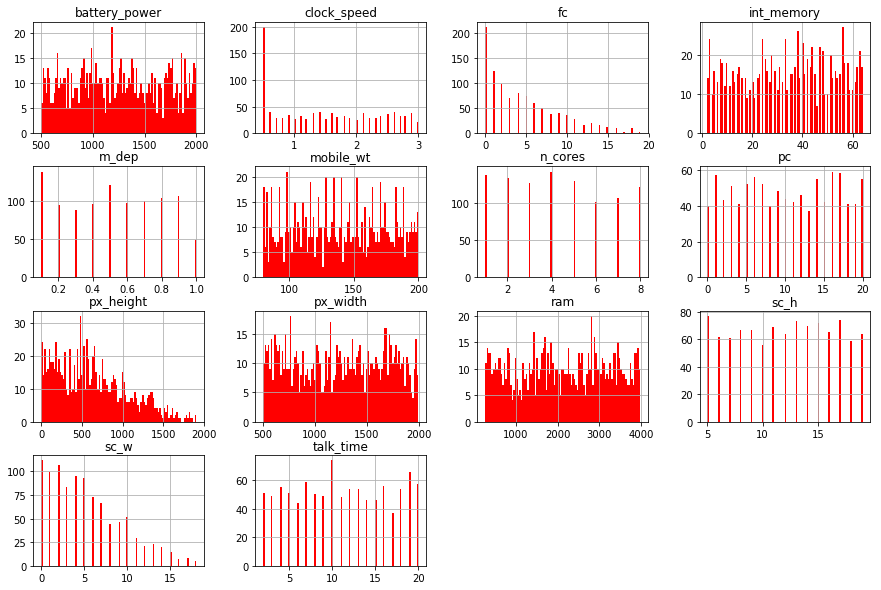

In [51]:
#vamos olhar também para os dados de teste
test[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
       'sc_w','talk_time']].hist(figsize=(15,10),color='red',bins=100);

#Os dados de treino apresentaram resultados semelhantes

Poderíamos parar por aqui, porém vamos aplicar também um teste estatístico de normalidade chamado de Shapiro-Wilk que testa se a distribuição dos dados é ou não normal. O teste de Shapiro-Wilk testa a hipótese nula de que os dados foram extraídos de uma distribuição normal.

Para decidir se os dados possuem distribuição normal ou não, vamos observar o p-valor. Se o p-valor for superior a 5% (nível de significância) então há evidência a favor da hipótese nula, ou seja, os dados são normais.

In [52]:
colunas=train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc',
               'px_height','px_width','ram','sc_h','sc_w','talk_time']].columns

In [53]:
for column in colunas:
    shapiro=stats.shapiro(train[column])
    print('O p-valor para a coluna da base de treino', column ,'é', shapiro[1])
    print(' '*254)

#Vemos que todos os p-valores estão abaixo de 5%, dessa forma as colunas em questão não são normais

O p-valor para a coluna da base de treino battery_power é 4.009382346038365e-25
                                                                                                                                                                                                                                                              
O p-valor para a coluna da base de treino clock_speed é 1.138689255356057e-32
                                                                                                                                                                                                                                                              
O p-valor para a coluna da base de treino fc é 1.739230333099164e-37
                                                                                                                                                                                                                                                              
O p-valo

In [54]:
for column in colunas:
    shapiro=stats.shapiro(test[column])
    print('O p-valor para a coluna da base de teste', column ,'é', shapiro[1])
    print(' '*254)

#mesma coisa para as colunas do dataset de teste

O p-valor para a coluna da base de teste battery_power é 1.0891682340110278e-16
                                                                                                                                                                                                                                                              
O p-valor para a coluna da base de teste clock_speed é 7.2554038142246e-24
                                                                                                                                                                                                                                                              
O p-valor para a coluna da base de teste fc é 1.045277985421564e-26
                                                                                                                                                                                                                                                              
O p-valor pa

Sendo que os resultados para os teste de normalidades das colunas apresentou evidência contra a hipótese nula, de normalidade, vamos então padronizar essas colunas.

## Identificação e tratamento de *Outliers*

Outra coisa que precisamos observar é se os dados possuem *outliers*, ou seja, valores muito discrepantes que podem influenciar as medidas de localização e de variabilidade dos dados e, consequentemente, podem afetar o desempenho dos modelos de machine learning.

Uma forma de identificar *outliers* é observando os gráficos Boxplot, que nos dão a divisão dos dados pelos seus quartis e em cada boxplot há um limite inferior e um limite superior, qualquer ponto que esteja fora desses limites são *outliers*. Quando identificamos muito *outliers* precisaremos tratá-los, ou removendo ou os substituindo (pela média aparada ou mediana).

No nosso caso há poucos *outliers* em nas colunas dos datasets de treino e teste, sendo assim não há necessidade de removê-los ou de substituir seus valores.

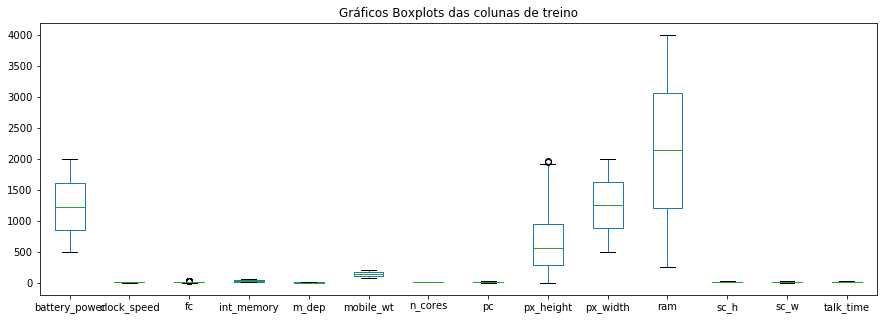

In [55]:
train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
       'sc_w','talk_time']].plot.box(figsize=(15,5),title='Gráficos Boxplots das colunas de treino');
#um outlier na coluna fc
#um outlier na coluna px_height

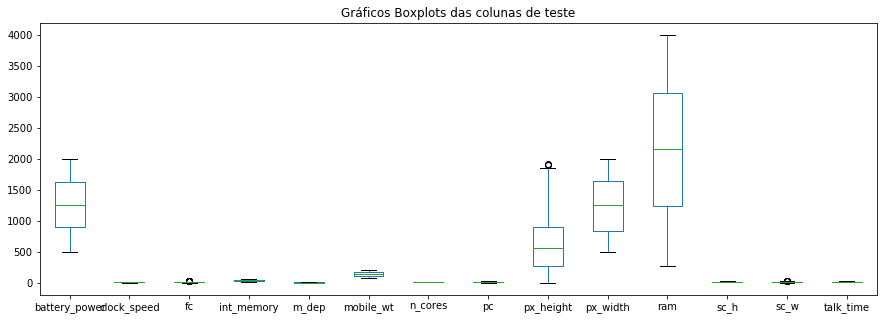

In [56]:
test[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
       'sc_w','talk_time']].plot.box(figsize=(15,5),title='Gráficos Boxplots das colunas de teste');
#um outlier na coluna fc
#um outlier na coluna px_width
#um outlier na coluna sc_w

## Correlação das features

Podemos ver que a variável que é mais correlacionada com 'price_range' é 'ram', já as outras demais features não ultrapassam 20% de correlação, ou seja, um correlação fraca.

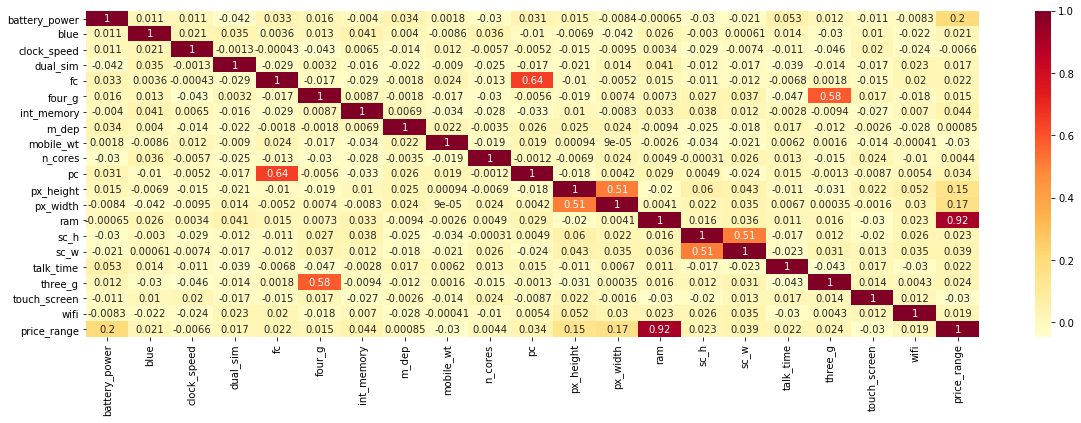

In [57]:
%matplotlib inline
plt.figure(figsize=(20,6))
correlacao2=train.corr()
sns.heatmap(correlacao2, annot = True, cmap = "YlOrRd");

## Padronização dos dados

Como falamos anteriormente, a padronização é mais adequada para problemas de classificação e é importante, pois, há modelo de machine learning que trabalham melhor com dado que tenham a distribuição normal e o processo de padronização fará essa transformação.

A padronização irá pegar os dados das colunas, subtratir deles a média da coluna e dividir pelo desvio-padrão das mesmas. Aqui também iremos passar esse procedimento nas variáveis binárias.

In [58]:
#separando a coluna com a variável target ou alvo
classe=train['price_range']
#separando as features
train=train.drop('price_range',axis=1)

In [59]:
scaler = StandardScaler().fit(train)
train=scaler.transform(train)

In [60]:
train=pd.DataFrame(train, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [61]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Separando os dados

Aqui iremos separar os dados de treino (o modelo aprenderá com esses dados) e teste (que serão usados para avaliar se o modelo está tendo um bom desempenho). O *train_test_split* irá separar os dados de treino e de teste de forma aleatória para eliminar o viés. Por padrão os dados serão separados em 75% para treino e 25% para teste.

Vamos aqui separar a variável alvo ou *target* das demais features.

In [62]:
#usaremos o train_test_split para separar os dados de treino teste
X_treino,X_teste,y_treino,y_teste=train_test_split(train,classe,random_state=42)

In [63]:
#aqui podemos ver as dimensões dos sub datasets 
print(X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape)

(1500, 20) (500, 20) (1500,) (500,)


## Aplicando a biblioteca de auto machine learning

Aqui aplicaremos a biblioteca TPOT e com o seu uso podemos dispensar a seleção de modelos de machine learning. Ao invés de ficarmos coletando modelos, treinando, testando, essa biblioteca já faz a seleção de diversos modelos de forma automática e gera diversos pipelines. Caberá aepnas o cálculo das métricas de avaliação (acurácia, recall, f1-score).

Definiremos na biblioteca cerca de 5 gerações, ou seja, ela vai gerar 5 pipelines.

In [65]:
#Instanciando o modelo

#generations são o número de vezes que a biblioteca vai fazer iterações para executar o processo de otimização de pipeline.
pipeline_optimizer = TPOTClassifier(generations=20, population_size=20, cv=7,random_state=42, verbosity=2)

In [66]:
#treinando o modelo
pipeline_optimizer.fit(X_treino,y_treino)

C:\Users\junio\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Generation 1 - Current best internal CV score: 0.9633247430682772
Generation 2 - Current best internal CV score: 0.9666656316949732
Generation 3 - Current best internal CV score: 0.9666656316949732
Generation 4 - Current best internal CV score: 0.9666656316949732
Generation 5 - Current best internal CV score: 0.9666656316949732
Generation 6 - Current best internal CV score: 0.969332753749185
Generation 7 - Current best internal CV score: 0.969332753749185
Generation 8 - Current best internal CV score: 0.969332753749185
Generation 9 - Current best internal CV score: 0.969332753749185
Generation 10 - Current best internal CV score: 0.9719936659732358
Generation 11 - Current best internal CV score: 0.9733287794578818
Generation 12 - Current best internal CV score: 0.9733287794578818
Generation 13 - Current best internal CV score: 0.9733287794578818
Generation 14 - Current best internal CV score: 0.9733287794578818
Generation 15 - Current best internal CV score: 0.9733287794578818
Generat

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=7,
               disable_update_check=False, early_stop=None, generations=20,
               log_file=<ipykernel.iostream.OutStream object at 0x00000215BDDFC4E0>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

Após as 20 generations o modelo gerou um modelo com um *cross validation score* de **97.33%**.

O modelo gerado foi um XGBClassifier(LinearSVC(LogisticRegression(input_matrix, C=0.1, dual=False, penalty=l2), C=10.0, dual=True, loss=hinge, penalty=l2, tol=0.01), learning_rate=1.0, max_depth=6, min_child_weight=3, n_estimators=100, nthread=1, 
#subsample=0.6000000000000001).

### Gerando previsões com os dados de teste

In [85]:
y_prev=pipeline_optimizer.predict(X_teste)

In [86]:
y_prev

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

## Analisando os resultados

Vamos analisar os resultados apresentados pelo modelo gerado pela biblioteca TPOT. Aqui iremos gerar a matriz de confusão do modelo, as métricas de avaliação para cada uma das classes e analisar se o modelo gerado possui alguma evidência de underfitting ou overfitting.

Abaixo podemos ver que o modelo não possui evidência de presença de overffiting nem de underfitting, pois a diferença entre o *score* de treino e o *score* de teste é pequena.

In [67]:
print('O score de treino do modelo gerado pela biblioteca TPOT foi:',pipeline_optimizer.score(X_treino, y_treino))
print('O score de teste do modelo gerado pela biblioteca TPOT foi:',pipeline_optimizer.score(X_teste, y_teste))

O score de treino do modelo gerado pela biblioteca TPOT foi: 1.0
O score de teste do modelo gerado pela biblioteca TPOT foi: 0.974


### Matriz de confusão

A matriz de confusão é útil, pois nos mostra onde o modelo 'confundiu' uma classe com a outra classe. Também, com ela, será possível calcular as métricas de avaliação do modelo.

Os valores que o modelo acertou estão na diagonal principal da matriz de confusão.

A matriz de confusão mostra que:

**1) para a classe 0 acertou 126 de 126 (100% de precisão);**

**2) para a classe 1 o modelo acertou 118 de 129, e 'confundiu' 6 observações com a classe 0 e 5 observações com a classe 2.**

**3) Na classe 2, acertou 109 de 110 e confundiu uma com a classe 3;**

**4) por fim, acertou 129 de 135 na classe3 e confundiu 6 com a classe2.**

In [208]:
print(pd.crosstab(y_teste,pipeline_optimizer.predict(X_teste),rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0    1    2    3  All
Real                            
0        126    6    0    0  132
1          0  118    0    0  118
2          0    5  109    6  120
3          0    0    1  129  130
All      126  129  110  135  500


### Métricas de avaliação

Como estamos avaliando uma classificação multiclasse, usaremos as seguintes métricas de avaliação: acurácia, precisão, recall e f1-score. Podemos ver que todos os resultados estão bem próximos um do outro, flutuando entre 97.4%.

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste,y_prev)

0.974

In [94]:
from sklearn.metrics import precision_score
print(precision_score(y_teste, y_prev,average='macro'))
print(precision_score(y_teste, y_prev,average='micro'))
print(precision_score(y_teste, y_prev,average='weighted'))

0.9744152046783625
0.974
0.9750910609857978


In [92]:
from sklearn.metrics import recall_score
print(recall_score(y_teste, y_prev,average='macro'))
print(recall_score(y_teste, y_prev,average='micro'))
print(recall_score(y_teste, y_prev,average='weighted'))

0.9740238927738928
0.974
0.974


In [90]:
from sklearn.metrics import f1_score
print(f1_score(y_teste, y_prev, average='macro'))
print(f1_score(y_teste, y_prev, average='micro'))
print(f1_score(y_teste, y_prev, average='weighted'))

0.9736771636042345
0.974
0.9740176760008462


### Relatório de métricas por classe

Abaixo podemos ver os resultados por classe.

A classe com maior precisão foi a classe 0, seguida da classe 2, depois 3 e, por fim, a classe 1. As demais métricas para todas as classes estão bem próximas d precisão, o que é um bom resultado.

In [103]:
from sklearn.metrics import classification_report
valor_classe=[0,1,2,3]
print(classification_report(y_teste,y_prev,valor_classe))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       132
           1       0.94      1.00      0.97       118
           2       0.99      0.94      0.97       120
           3       0.97      0.99      0.98       130

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.98      0.97      0.97       500



# Classificando o *dataset* de treino

Agora que temos um modelo com um bom desempenho, vamos usá-lo em dados da base teste para gerar a classificação com os dados do *dataset* de teste. Antes disso vamos fazer o procedimento de padronização no *dataset* de teste.

In [68]:
scaler = StandardScaler().fit(test)
test=scaler.transform(test)

In [69]:
test

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [70]:
#classificando a base de teste
pipeline_optimizer.predict(test)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [73]:
prev=pd.DataFrame(pipeline_optimizer.predict(test))

Abaixo podemos ver o valor predito para cada uma das classes.

In [134]:
prev[0].value_counts()

3    258
2    257
0    254
1    231
Name: 0, dtype: int64

Abaixo, de forma gráfico e ordenadas as classes, os mesmo valores acima.

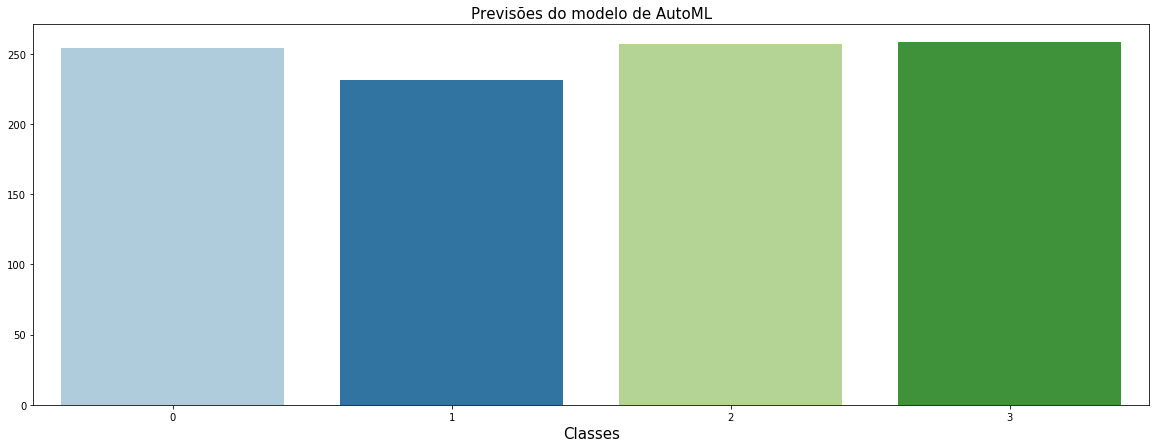

In [138]:
plt.figure(figsize=(20,7))
sns.countplot(prev[0],palette='Paired')
plt.title('Previsões do modelo de AutoML',size=15)
plt.xlabel('Classes',size=15)
plt.ylabel('')
plt.show()

## Conclusão

Usamos a a biblioteca de AutoML TPOT e obtivemos um modelo com uma alta acurácia e com métricas de avaliação bastante elevadas, sem a necessidade de ficarmos escolhendo modelos e de fazer *tunnings* com os hiperparâmetros. 